In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt      
import math
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
data = pd.read_csv("pre_EDA_dataset.csv").drop(columns= ['Unnamed: 0'])

In [3]:
data.head()

,song_name,artist,spotify_track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,tracks_popularity,entered_biilboard
0,heat waves,glass animals,02MWAaffLxlfxAUY7c5dvx,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,0.531,80.870,238805,4,88,1
1,as it was,harry styles,4LRPiXqCikLlN15c3yImP7,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,167303,4,94,1
2,stay,the kid laroi & justin bieber,5HCyWlXZPP0y6Gqq8TgA20,0.591,0.764,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,0.478,169.928,141806,4,89,1
3,easy on me,adele,0gplL1WMoJ6iYaPgMCL0gX,0.604,0.366,5,-7.519,1,0.0282,0.5780,0.000000,0.1330,0.130,141.981,224695,4,85,1
4,shivers,ed sheeran,50nfwKoDiSYg8zOCREWAm5,0.788,0.859,2,-2.724,1,0.0856,0.2810,0.000000,0.0424,0.822,141.020,207853,4,88,1


# Overview on our data

In [4]:
#describe numeric vars
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,tracks_popularity,entered_biilboard
count,2514.000000,2514.00000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000
mean,0.651676,0.61134,5.258154,-6.885924,0.632856,0.111440,0.245350,0.028288,0.177497,0.464692,122.265853,204380.564041,3.922037,76.035402,0.411695
std,0.151289,0.18335,3.598396,3.104403,0.482122,0.110746,0.265124,0.132567,0.132726,0.229195,30.003117,50455.190090,0.404274,10.612553,0.492238
min,0.000000,0.00002,0.000000,-40.449000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51914.000000,0.000000,0.000000,0.000000
25%,0.555250,0.49725,2.000000,-8.126750,0.000000,0.038500,0.035400,0.000000,0.097900,0.286000,98.071250,174324.750000,4.000000,72.250000,0.000000
50%,0.664000,0.62300,5.000000,-6.344500,1.000000,0.059750,0.133000,0.000000,0.123000,0.457000,121.309000,203373.000000,4.000000,77.000000,0.000000
75%,0.760000,0.74500,8.000000,-4.988000,1.000000,0.138000,0.392750,0.000067,0.214000,0.636000,141.988750,229707.500000,4.000000,82.000000,1.000000
max,0.973000,1.00000,11.000000,-0.514000,1.000000,0.737000,0.996000,1.000000,0.943000,0.980000,220.099000,688453.000000,5.000000,100.000000,1.000000


In [5]:
# data_heatmap = pd.DataFrame(data, columns = data.columns)
# sns.heatmap(data_heatmap.corr(), annot=True, linewidth=1)

In [6]:
cat_cols = ["key" , "time_signature", "mode"]
bool_cols = ["entered_biilboard"]

for col in data.columns:
    if type(col) == "float64":
        data[col] = data[col].astype("numeric")

In [7]:
# creating a list of numeric columns
num_vars = [col for col in data.columns if ((col not in cat_cols) and (col not in ["song_name", "artist", "spotify_track_id"]))]
print(num_vars)

['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'tracks_popularity', 'entered_biilboard']


# Data before Cleaning

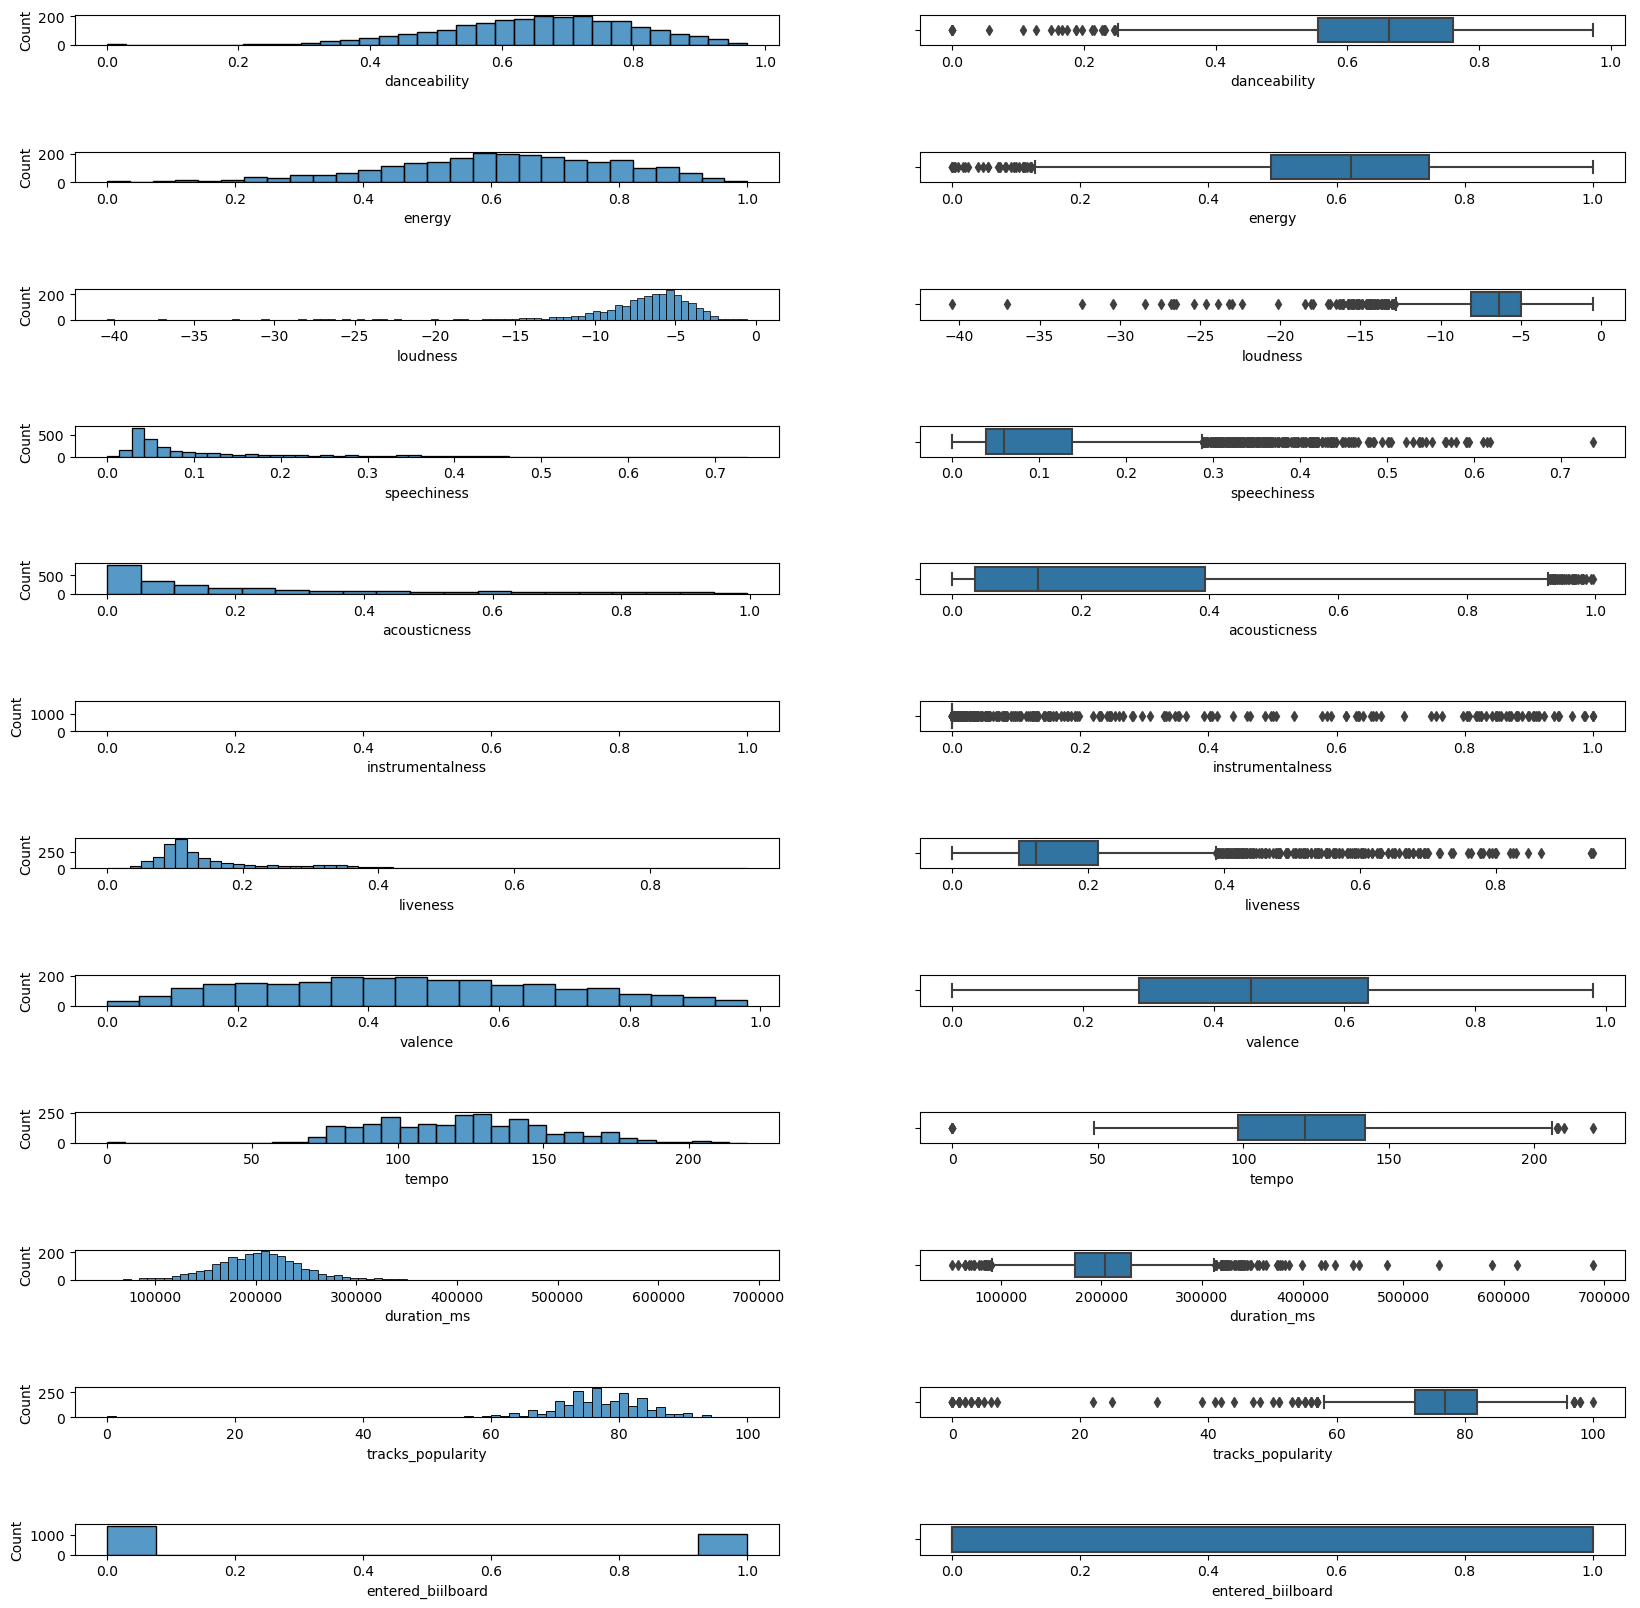

In [8]:
num_vars_len = len(num_vars)

fig, ax = plt.subplots(num_vars_len,2, figsize = (20,20))
plt.subplots_adjust(hspace=3.5)

for i, var in enumerate(num_vars):
    sns.histplot(data = data, x = var, ax = ax[i,0])
    sns.boxplot(data = data, x = var, ax = ax[i,1])

# Data cleaning
using IQR methood

In [9]:
all_outlier_rows = []
for col in num_vars:
        Q1 = np.percentile(data[col], 25)
        Q3 = np.percentile(data[col], 75)
        IQR = Q3 - Q1
        IQR_range = 1.5 * IQR
        col_outlier = data[(data[col] < Q1 - IQR_range) | 
                              (data[col] > Q3 + IQR_range )].index
        all_outlier_rows.extend(col_outlier)

In [10]:
outliers_df = data.loc[all_outlier_rows]

In [11]:
outliers_df.shape

(1307, 18)

In [12]:
outliers_df.duplicated().sum()

308

In [13]:
outliers_quniqe_list = list(set(all_outlier_rows))

In [14]:
len(outliers_quniqe_list)

999

In [15]:
cln_data = data.drop(axis = 0, index= outliers_quniqe_list, inplace = False)

In [16]:
# cln_data.to_csv("clean_data.csv")

# Data after IQR cleaning outliers
visualizing the data using histograms and boxplots 

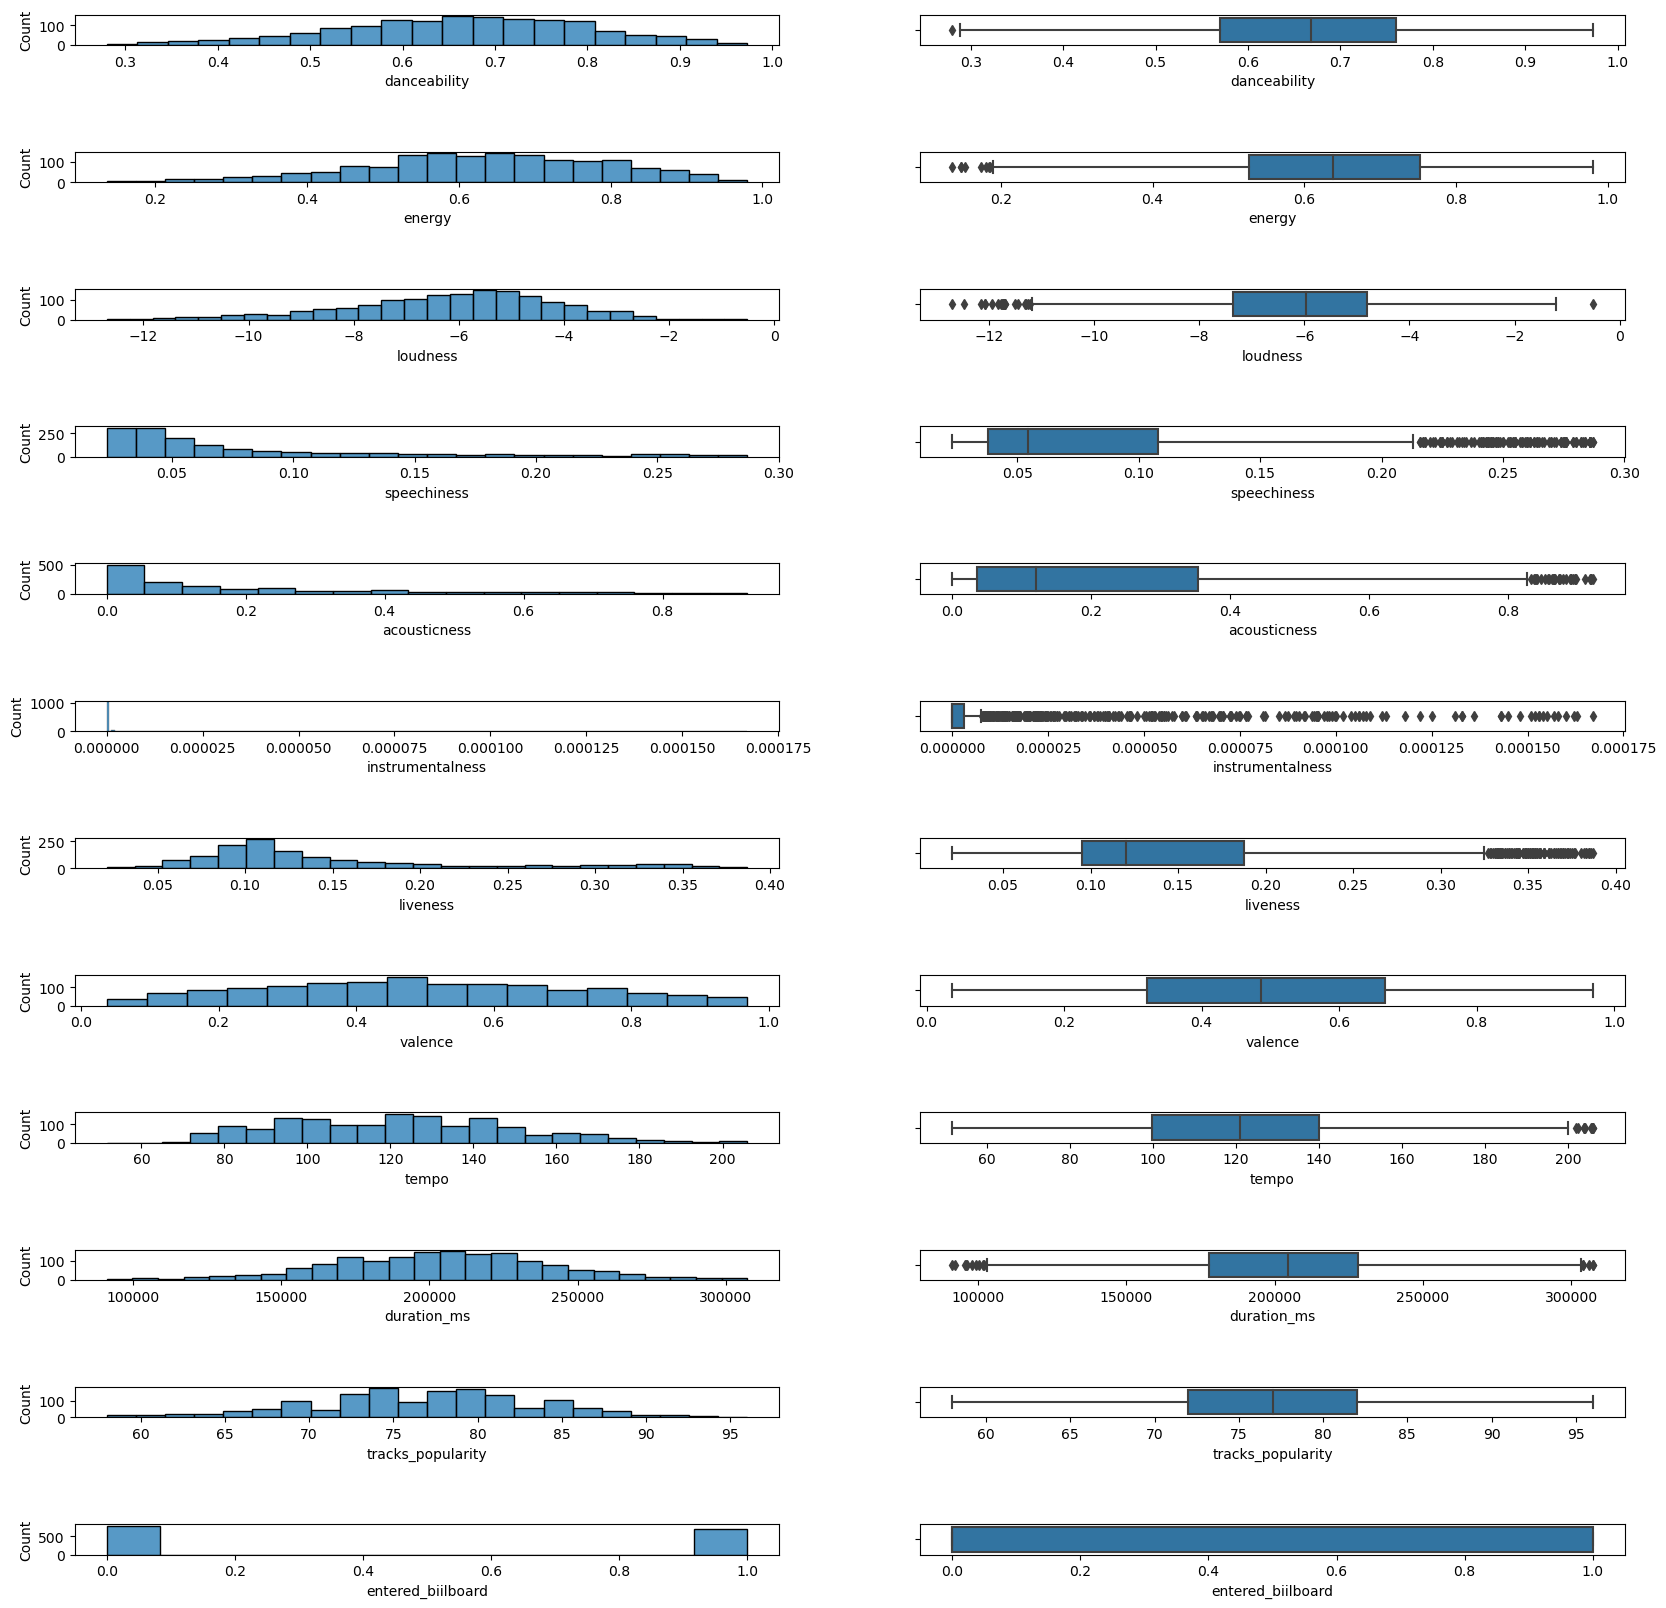

In [17]:
num_vars_len = len(num_vars)

fig, ax = plt.subplots(num_vars_len,2, figsize = (20,20))
plt.subplots_adjust(hspace=3.5)

for i, var in enumerate(num_vars):
    sns.histplot(data = cln_data, x = var, ax = ax[i,0])
    sns.boxplot(data = cln_data, x = var, ax = ax[i,1])

In [35]:
# cln_data.to_csv('cln_data.csv')

In [37]:
df=cln_data[cln_data['entered_biilboard'] == 1]
df

,song_name,artist,spotify_track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,tracks_popularity,entered_biilboard
0,heat waves,glass animals,02MWAaffLxlfxAUY7c5dvx,0.761,0.525,11,-6.900,1,0.0944,0.440000,0.000007,0.0921,0.5310,80.870,238805,4,88,1
2,stay,the kid laroi & justin bieber,5HCyWlXZPP0y6Gqq8TgA20,0.591,0.764,1,-5.484,1,0.0483,0.038300,0.000000,0.1030,0.4780,169.928,141806,4,89,1
3,easy on me,adele,0gplL1WMoJ6iYaPgMCL0gX,0.604,0.366,5,-7.519,1,0.0282,0.578000,0.000000,0.1330,0.1300,141.981,224695,4,85,1
4,shivers,ed sheeran,50nfwKoDiSYg8zOCREWAm5,0.788,0.859,2,-2.724,1,0.0856,0.281000,0.000000,0.0424,0.8220,141.020,207853,4,88,1
5,first class,jack harlow,0wHFktze2PHC5jDt3B17DC,0.902,0.582,5,-5.902,0,0.1090,0.111000,0.000003,0.1110,0.3320,107.005,173948,4,86,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506,price tag,jessie j featuring b.o.b,5mvKuE9Lf9ARVXVXA32kK9,0.638,0.831,5,-3.944,1,0.1820,0.028100,0.000003,0.2770,0.6850,175.038,223053,4,59,1
2508,she will,lil wayne featuring drake,0b4M7hd7mzLTm99MrMeZsp,0.364,0.841,8,-4.831,1,0.1190,0.000402,0.000000,0.2420,0.0841,100.140,305840,5,64,1
2509,are you gonna kiss me or not,thompson square,2TAcwD5KcV9uY3O1tLGV15,0.485,0.701,8,-3.807,1,0.0288,0.039000,0.000000,0.0977,0.6130,151.948,184920,4,62,1
2510,animal,neon trees,1fBl642IhJOE5U319Gy2Go,0.482,0.833,5,-5.611,1,0.0449,0.000346,0.000000,0.3650,0.7400,148.039,212293,4,66,1


In [38]:
df.to_csv('hits_clean_data.csv')